<html>
    <h1 style='background:gray;  color:pink; font-size:50px; padding:15px; border:8px solid red;'><center><b>MOTIVATION</b></center></h1>
</html>

![EXAMS](https://www.theschoolrun.com/sites/theschoolrun.com/files/article_images/child_taking_exam_0.jpg)

* **IN THIS NOTEBOOK WE WILL ANALYSE THE PERFORMANCE OF STUDENTS BASED VARIOUS FEATURES SUCH AS GENDER , PARENT'S BACKGROUND AND STATUS OF TEST PREPARATIONS**

* **WE WILL ANALYSE EACH COLUMN WITH THE HELP OF VISULAIZATIONS**

* **WHAT WE WILL DO?**
  * **WE WILL ANALYSE WHICH GENDER IS PERFORMED BETTER**
  * **CAN WE PRESUME STUDENT'S PERFORMANCE BASED ON HIS/HER RACE OR ETHNICITY?**
  * **DOES PARENT'S EDUCATION BACKGROUND MATTERS?**
  * **DOES STANDARD OF LUNCH MAKE DIFFERENCE IN STUDENT'S PERFORMANCE?**
  * **WILL STUDENT PERFORM GOOD IS HE PREPARED FOR THE EXAM OR NOT? AND VICE VERSA**
  

<html>
    <h1 style='background:gray;  color:pink; font-size:50px; padding:15px; border:8px solid red;'><center><b>DATASET</b></center></h1>
</html>

* **GENDER : Gender of students**

* **RACE/ETHNICITY : Which social group or race student is related to**

* **PARENTAL LEVEL OF EDUCATION : Background of parent's education**

* **LUNCH : Standard of lunch**

* **TEST PREPARATION COURSE : student is prepared or not**

* **MATH,READING AND WRITING SCORE : marks secured by students**

<html>
    <p style='background:teal; color:coral; font-size:20px; padding:10px;'><b>IMPORTING LIBRARIES</b></p>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

<html>
    <h1 style='background:gray;  color:pink; font-size:50px; padding:15px; border:10px solid red;'><center><b>OVERVIEW</b></center></h1>
</html>

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("***** Shape of dataset is *****")
print("  ")
print(df.shape)

***** Shape of dataset is *****
  
(1000, 8)


In [5]:
print("***** Name of the Columns in dataset are *****")
print(" ")
print(list(df.columns))

***** Name of the Columns in dataset are *****
 
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [6]:
print("***** Dtypes of dataset *****")
print("  ")
print(df.dtypes)

***** Dtypes of dataset *****
  
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [7]:
print("***** Description of continuous features *****")
print("  ")
df.describe()

***** Description of continuous features *****
  


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
print("***** Information about dataset *****")
print("  ")
print(df.info())

***** Information about dataset *****
  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


* ***There are 5 categorical columns and 3 continuous features in the data***
* ***There is no null value in the dataset***

***Dropping duplicates if any*** 

In [9]:
df_dup=df.drop_duplicates()
print("***** Shape of data after removing duplicates *****")
print()
print(df.shape)

***** Shape of data after removing duplicates *****

(1000, 8)


<html>
    <h1 style='background:gray;  color:pink; font-size:50px; padding:15px; border:10px solid red;'><center><b>VISUALIZATIONS</b></center></h1>
</html>

<html>
    <p style='background:teal; color:coral; font-size:20px; padding:10px;'><b>CATEGORICAL COLUMNS</b></p>
</html>

 1.   ***gender*** 
 
 2.   ***race/ethnicity***
 
 3.   ***parental level of education***
 
 4.   ***lunch***
 
 5.   ***test preparation course***      

In [10]:
def with_hue(data,feature,ax):
    
    #Number of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=12)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=12)


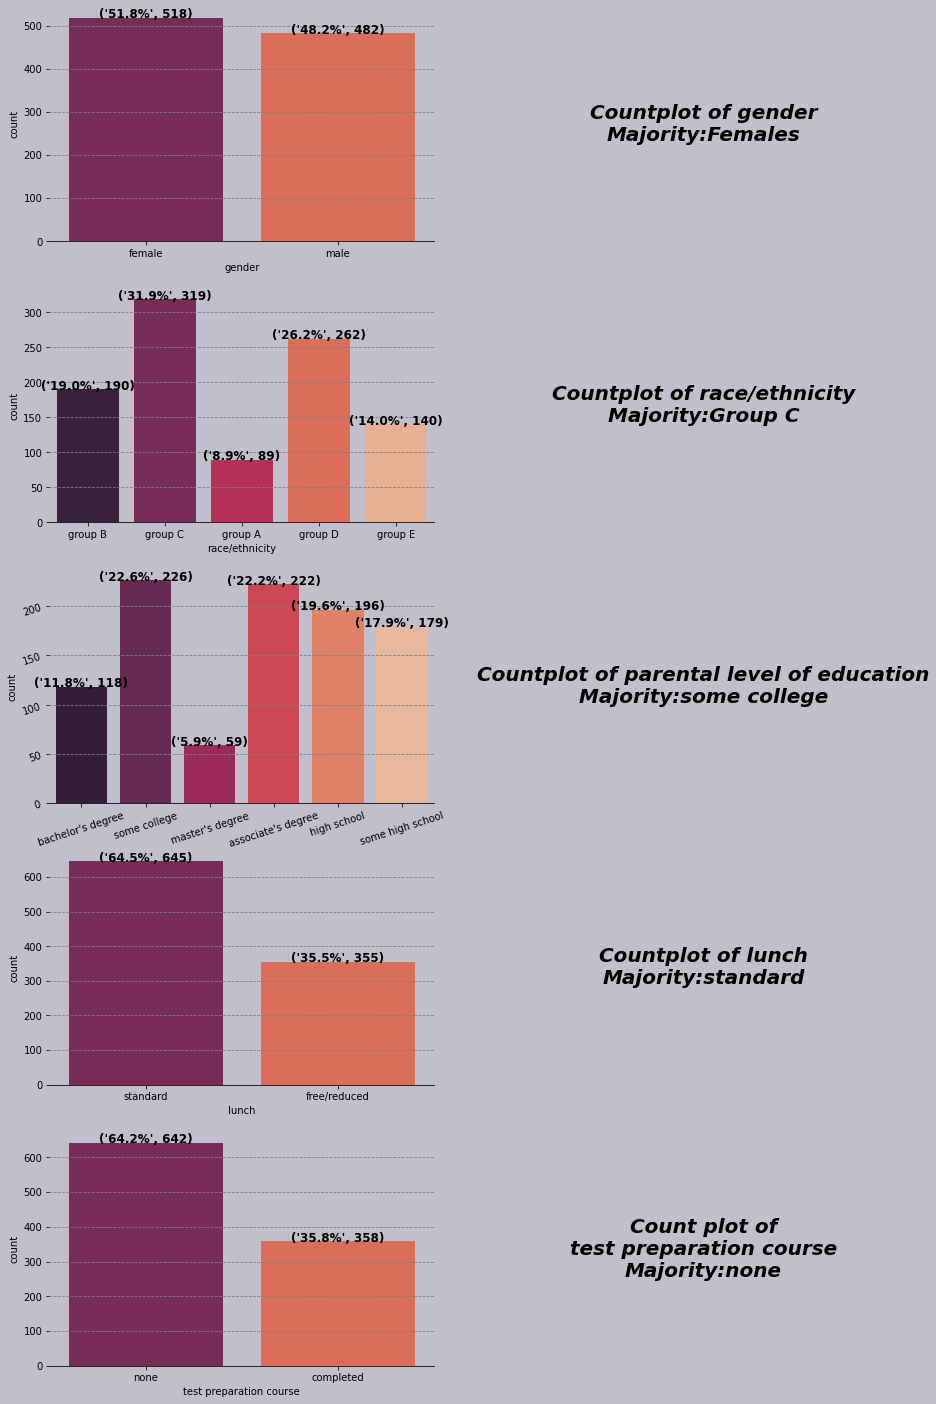

In [11]:
fig=plt.figure(figsize=(40,25))
grids=fig.add_gridspec(5,5)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])
ax30=fig.add_subplot(grids[3,0])
ax31=fig.add_subplot(grids[3,1])
ax40=fig.add_subplot(grids[4,0])
ax41=fig.add_subplot(grids[4,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21,ax30,ax31,ax40,ax41]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


a1=sns.countplot(data=df,x='gender',palette='rocket',ax=ax00)
without_hue(df,'gender',a1)
ax01.text(0.5,0.5,"Countplot of gender\nMajority:Females",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a2=sns.countplot(data=df,x='race/ethnicity',palette='rocket',ax=ax10)
without_hue(df,'race/ethnicity',a2)
ax11.text(0.5,0.5,"Countplot of race/ethnicity\nMajority:Group C",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a3=sns.countplot(data=df,x='parental level of education',palette='rocket',ax=ax20)
without_hue(df,'parental level of education',a3)
ax21.text(0.5,0.5,"Countplot of parental level of education\nMajority:some college",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')
ax20.tick_params(labelrotation=18)

a4=sns.countplot(data=df,x='lunch',palette='rocket',ax=ax30)
without_hue(df,'lunch',a4)
ax31.text(0.5,0.5,"Countplot of lunch\nMajority:standard",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a5=sns.countplot(data=df,x='test preparation course',palette='rocket',ax=ax40)
without_hue(df,'test preparation course',a5)
ax41.text(0.5,0.5,"Count plot of\ntest preparation course\nMajority:none",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')



description=[ax01,ax11,ax21,ax31,ax41]
for i in description:
    i.spines['bottom'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(left=False,bottom=False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    
description_plots=[ax00,ax10,ax20,ax30,ax40]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')
    
    

<html>
    <p style='background:teal; color:coral; font-size:20px; padding:10px;'><b>CONTINUOUS COLUMNS</b></p>
</html>

* **All three continuous columns have high correlation between them**

<AxesSubplot:title={'center':'Heatmap of continuous features'}>

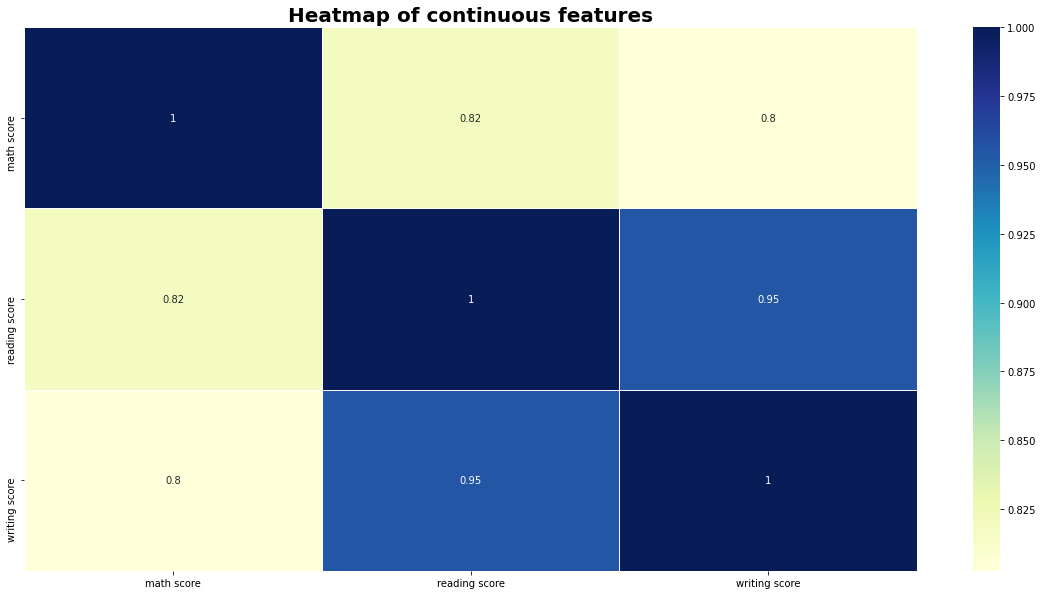

In [12]:
plt.figure(figsize=(20,10))
x_vars=['math score','reading score','writing score']
y_vars=['math score','reading score','writing score']
plt.title("Heatmap of continuous features",fontweight='bold',fontsize=20)
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=1)


In [13]:
print(df['math score'].median(),df['writing score'].median(),df['reading score'].median())

66.0 69.0 70.0


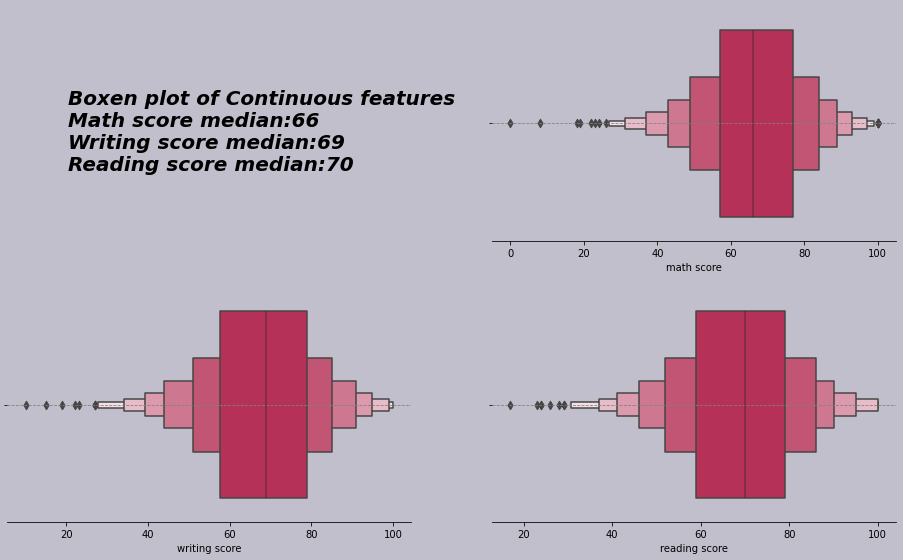

In [14]:
fig=plt.figure(figsize=(42,25))
grids=fig.add_gridspec(5,5)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])

axes=[ax00,ax01,ax10,ax11]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


sns.boxenplot(data=df,x='math score',palette='rocket',ax=ax01)
sns.boxenplot(data=df,x='writing score',palette='rocket',ax=ax10)
sns.boxenplot(data=df,x='reading score',palette='rocket',ax=ax11)

description_plots=[ax01,ax10,ax11]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')
    
ax00.text(0.15,0.3,"Boxen plot of Continuous features\nMath score median:66\nWriting score median:69\nReading score median:70",fontsize=20,fontweight='bold',fontstyle='italic')
ax00.spines['bottom'].set_visible(False)
ax00.spines['left'].set_visible(False)
ax00.spines['top'].set_visible(False)
ax00.spines['right'].set_visible(False)
ax00.tick_params(left=False,bottom=False)
ax00.set_xticklabels([])
ax00.set_yticklabels([])
    
plt.show()

**DISTRIBUTION OF CONTINUOUS FEATURES W.R.T CATEGORICAL FEATURES**

<html>
    <p style='color:lightblue; font-size:20px;'><b>MATH SCORE</b></p>
</html>

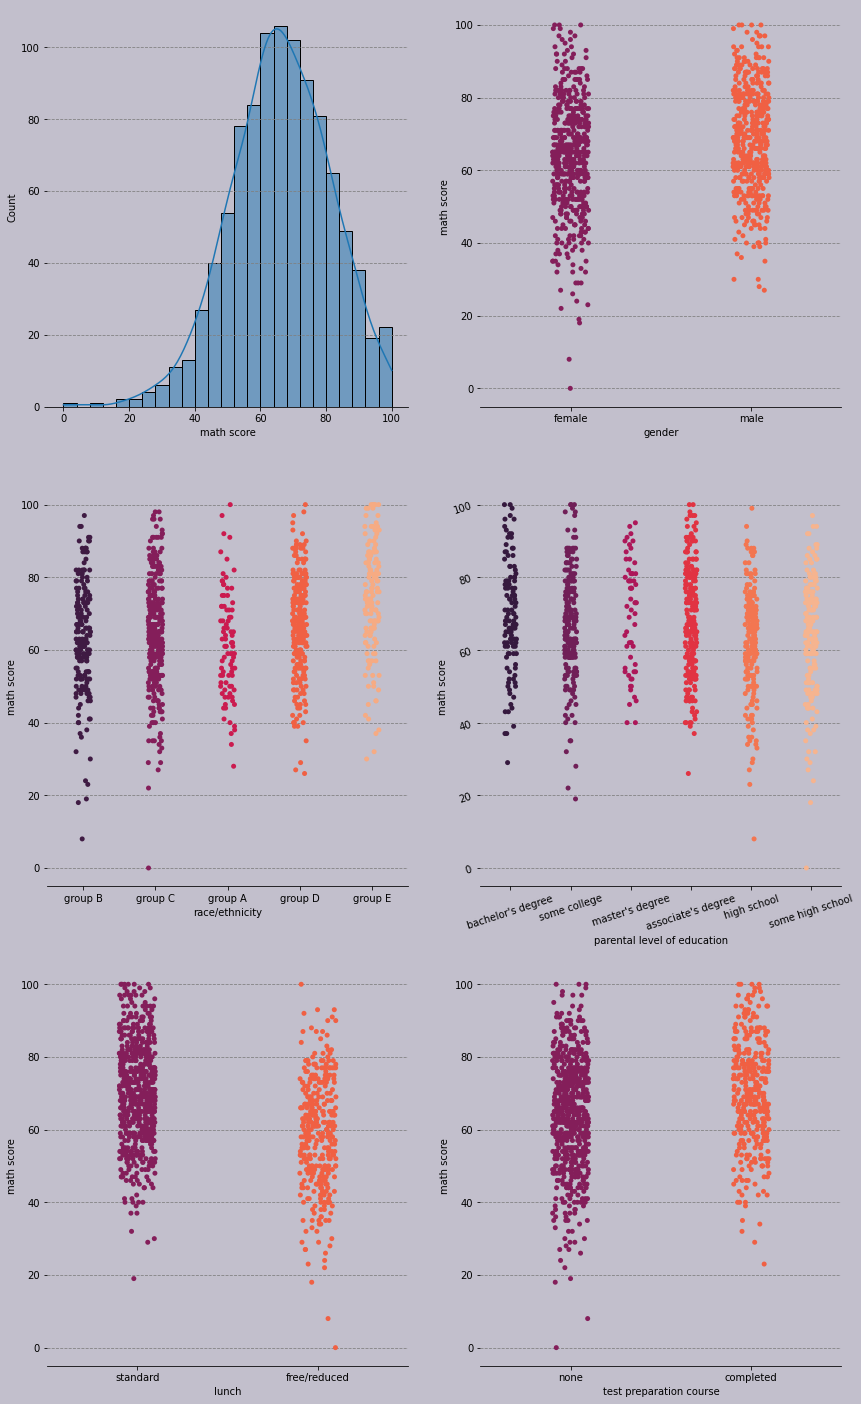

In [15]:
fig=plt.figure(figsize=(22,25))
grids=fig.add_gridspec(3,3)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.histplot(df,x='math score',palette='rocket',kde=True,ax=ax00)
sns.stripplot(data=df,y='math score',x='gender',palette='rocket',ax=ax01)

sns.stripplot(data=df,y='math score',x='race/ethnicity',palette='rocket',ax=ax10)
sns.stripplot(data=df,y='math score',x='parental level of education',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)

sns.stripplot(data=df,y='math score',x='lunch',palette='rocket',ax=ax20)
sns.stripplot(data=df,y='math score',x='test preparation course',palette='rocket',ax=ax21)

description_plots=[ax00,ax01,ax10,ax11,ax20,ax21]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')



<html>
    <p style='color:lightblue; font-size:20px;'><b>READING SCORE</b></p>
</html>

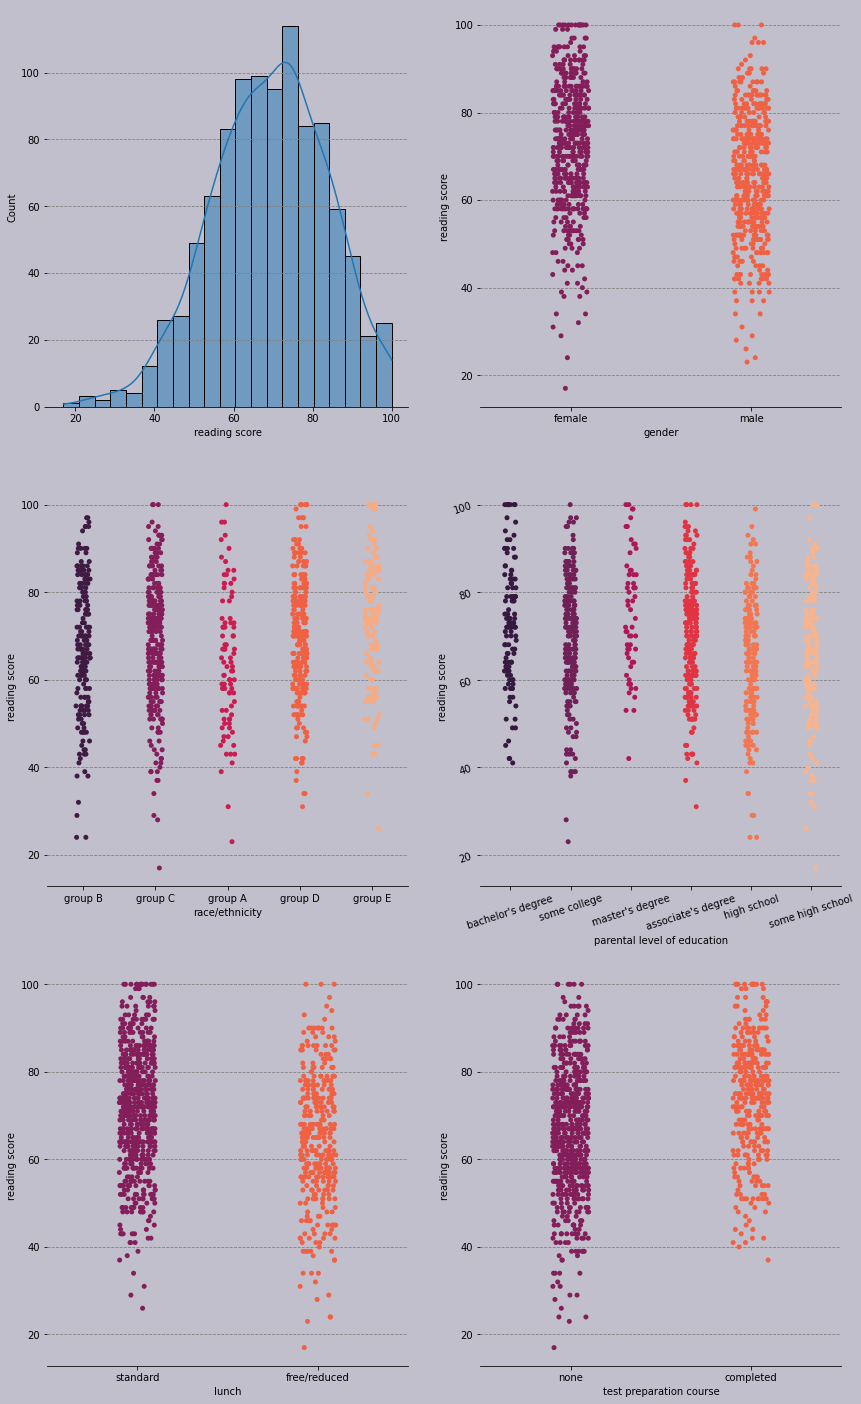

In [16]:
fig=plt.figure(figsize=(22,25))
grids=fig.add_gridspec(3,3)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.histplot(df,x='reading score',palette='rocket',kde=True,ax=ax00)
sns.stripplot(data=df,y='reading score',x='gender',palette='rocket',ax=ax01)

sns.stripplot(data=df,y='reading score',x='race/ethnicity',palette='rocket',ax=ax10)
sns.stripplot(data=df,y='reading score',x='parental level of education',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)

sns.stripplot(data=df,y='reading score',x='lunch',palette='rocket',ax=ax20)
sns.stripplot(data=df,y='reading score',x='test preparation course',palette='rocket',ax=ax21)
description_plots=[ax00,ax01,ax10,ax11,ax20,ax21]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')



<html>
    <p style='color:lightblue; font-size:20px;'><b>WRITING SCORE</b></p>
</html>

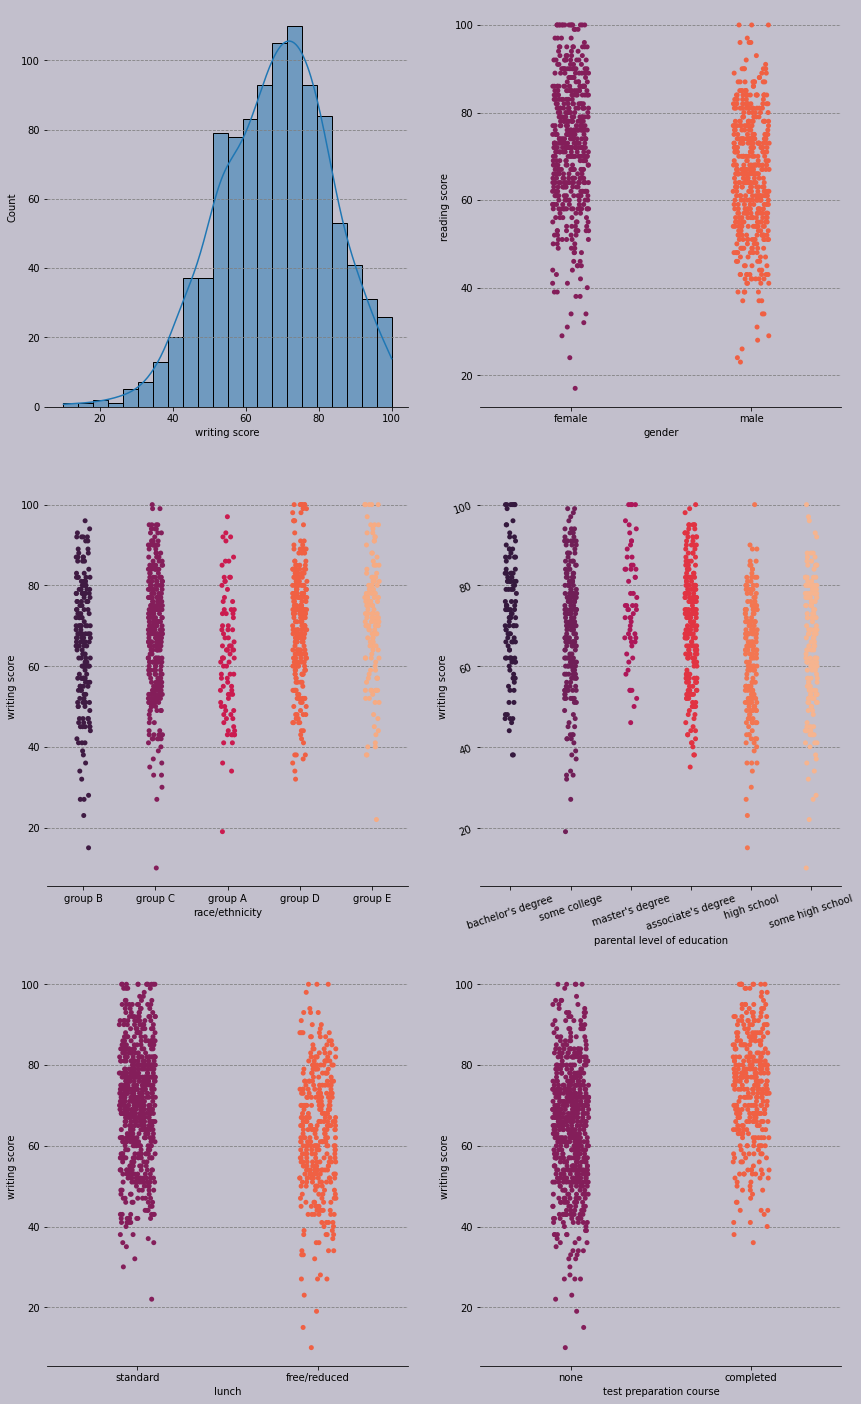

In [17]:
fig=plt.figure(figsize=(22,25))
grids=fig.add_gridspec(3,3)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.histplot(df,x='writing score',palette='rocket',kde=True,ax=ax00)
sns.stripplot(data=df,y='reading score',x='gender',palette='rocket',ax=ax01)

sns.stripplot(data=df,y='writing score',x='race/ethnicity',palette='rocket',ax=ax10)
sns.stripplot(data=df,y='writing score',x='parental level of education',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)

sns.stripplot(data=df,y='writing score',x='lunch',palette='rocket',ax=ax20)
sns.stripplot(data=df,y='writing score',x='test preparation course',palette='rocket',ax=ax21)

description_plots=[ax00,ax01,ax10,ax11,ax20,ax21]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')



<html>
    <p style='color:lightblue; font-size:20px;'><b>WHO WAS NOT PREPARED?</b></p>
</html>

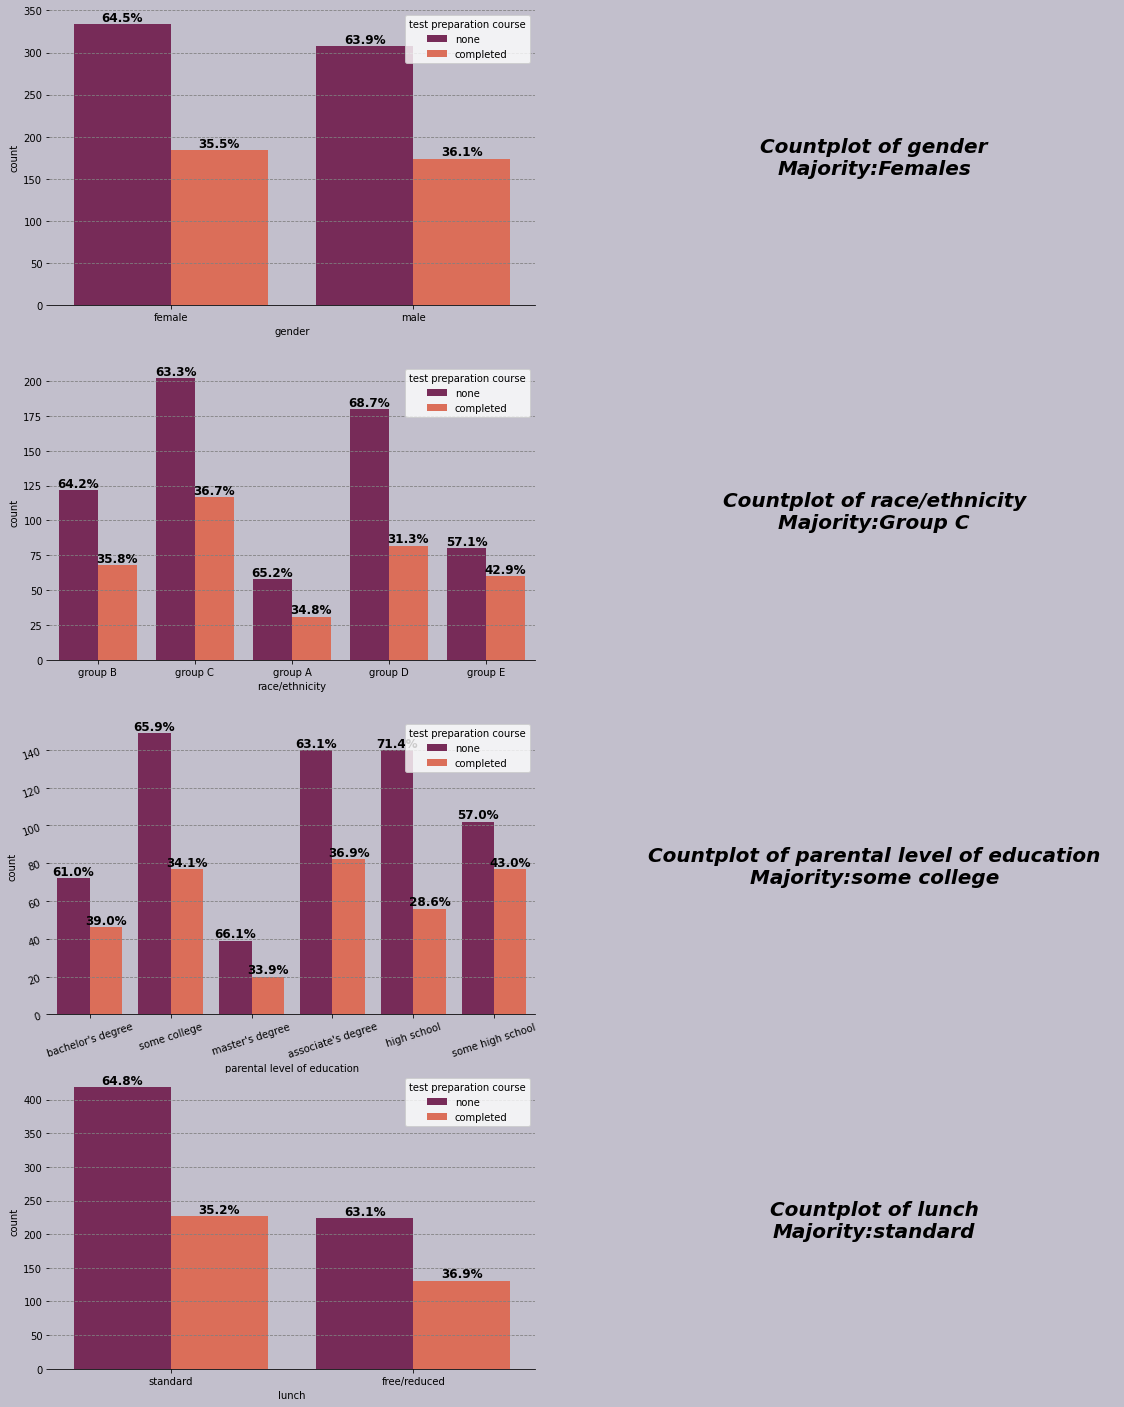

In [18]:
fig=plt.figure(figsize=(40,25))
grids=fig.add_gridspec(4,4)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])
ax30=fig.add_subplot(grids[3,0])
ax31=fig.add_subplot(grids[3,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21,ax30,ax31]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


a1=sns.countplot(data=df,x='gender',palette='rocket',hue='test preparation course',ax=ax00)
with_hue(df,'gender',a1)
ax01.text(0.5,0.5,"Countplot of gender\nMajority:Females",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a2=sns.countplot(data=df,x='race/ethnicity',palette='rocket',ax=ax10,hue='test preparation course')
with_hue(df,'race/ethnicity',a2)
ax11.text(0.5,0.5,"Countplot of race/ethnicity\nMajority:Group C",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a3=sns.countplot(data=df,x='parental level of education',palette='rocket',ax=ax20,hue='test preparation course')
with_hue(df,'parental level of education',a3)
ax21.text(0.5,0.5,"Countplot of parental level of education\nMajority:some college",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')
ax20.tick_params(labelrotation=18)

a4=sns.countplot(data=df,x='lunch',palette='rocket',ax=ax30,hue='test preparation course')
with_hue(df,'lunch',a4)
ax31.text(0.5,0.5,"Countplot of lunch\nMajority:standard",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')



description=[ax01,ax11,ax21,ax31]
for i in description:
    i.spines['bottom'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(left=False,bottom=False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    
description_plots=[ax00,ax10,ax20,ax30]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')
    


* **Well majority of students in each category was not prepared**

<html>
    <p style='color:lightblue; font-size:20px;'><b>LUNCH DIVISION</b></p>
</html>

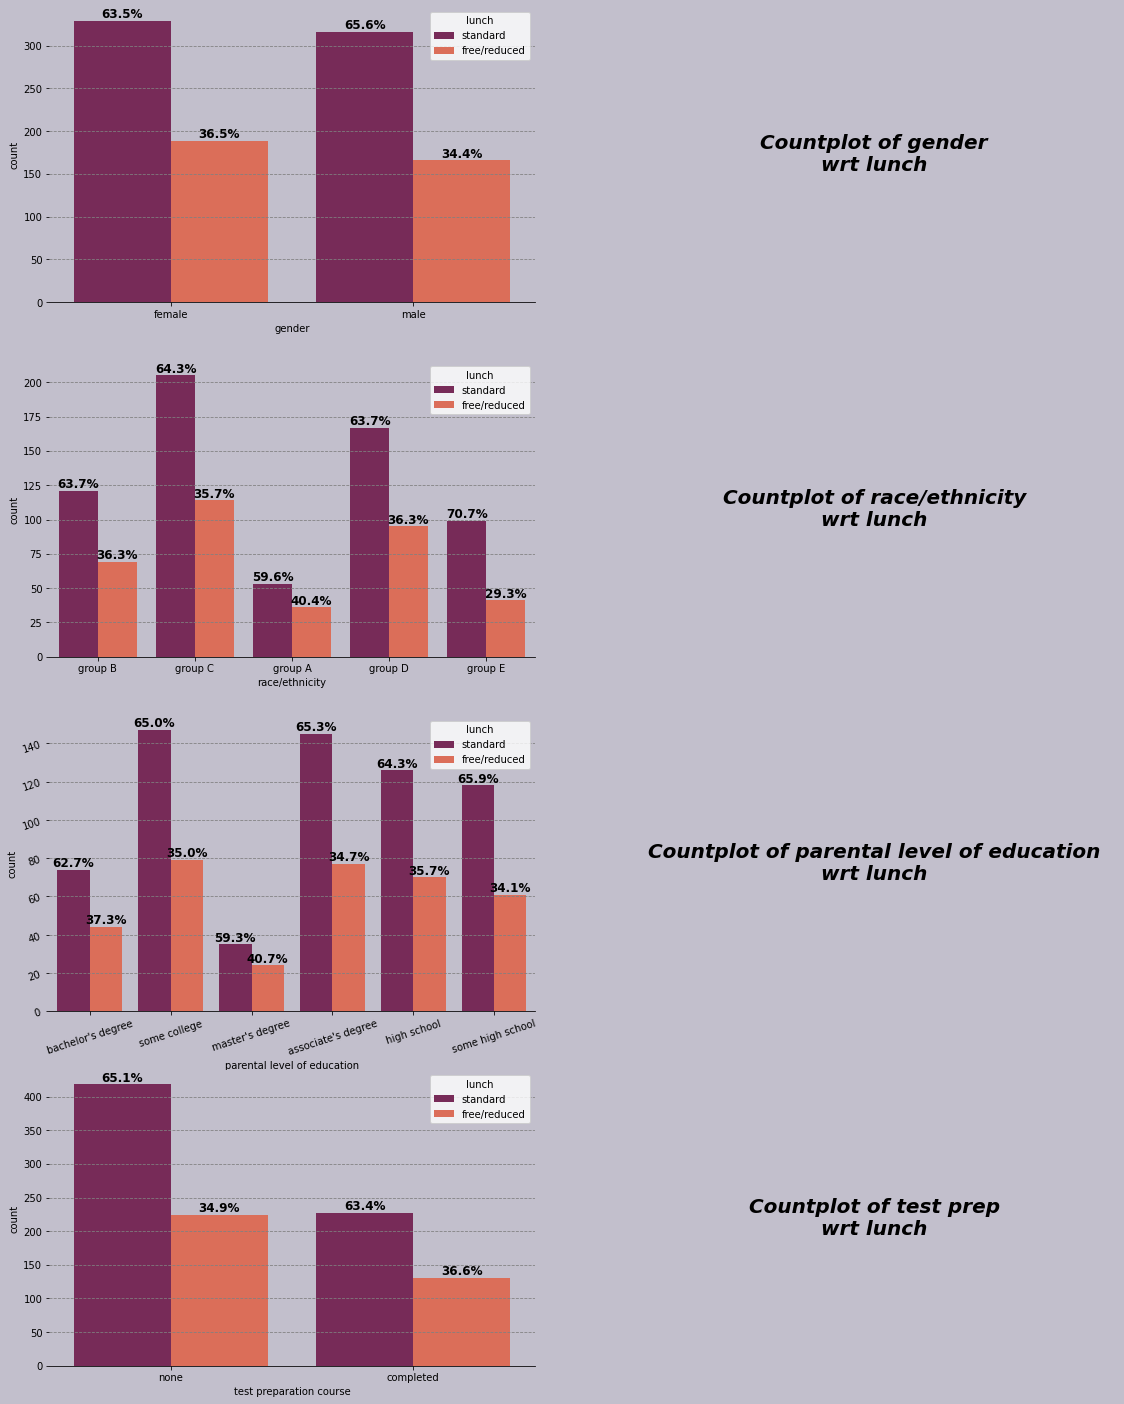

In [19]:
fig=plt.figure(figsize=(40,25))
grids=fig.add_gridspec(4,4)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])
ax30=fig.add_subplot(grids[3,0])
ax31=fig.add_subplot(grids[3,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21,ax30,ax31]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


a1=sns.countplot(data=df,x='gender',palette='rocket',hue='lunch',ax=ax00)
with_hue(df,'gender',a1)
ax01.text(0.5,0.5,"Countplot of gender\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a2=sns.countplot(data=df,x='race/ethnicity',palette='rocket',ax=ax10,hue='lunch')
with_hue(df,'race/ethnicity',a2)
ax11.text(0.5,0.5,"Countplot of race/ethnicity\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a3=sns.countplot(data=df,x='parental level of education',palette='rocket',ax=ax20,hue='lunch')
with_hue(df,'parental level of education',a3)
ax21.text(0.5,0.5,"Countplot of parental level of education\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')
ax20.tick_params(labelrotation=18)

a4=sns.countplot(data=df,x='test preparation course',palette='rocket',ax=ax30,hue='lunch')
with_hue(df,'lunch',a4)
ax31.text(0.5,0.5,"Countplot of test prep\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')



description=[ax01,ax11,ax21,ax31]
for i in description:
    i.spines['bottom'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(left=False,bottom=False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    
description_plots=[ax00,ax10,ax20,ax30]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')
    


* **Let's make a new column i.e. overall score and will examine over all peroformance of students**
* **As the number of features is small we will have fun with each category w.r.t other**

In [20]:
df['overall_score']=df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


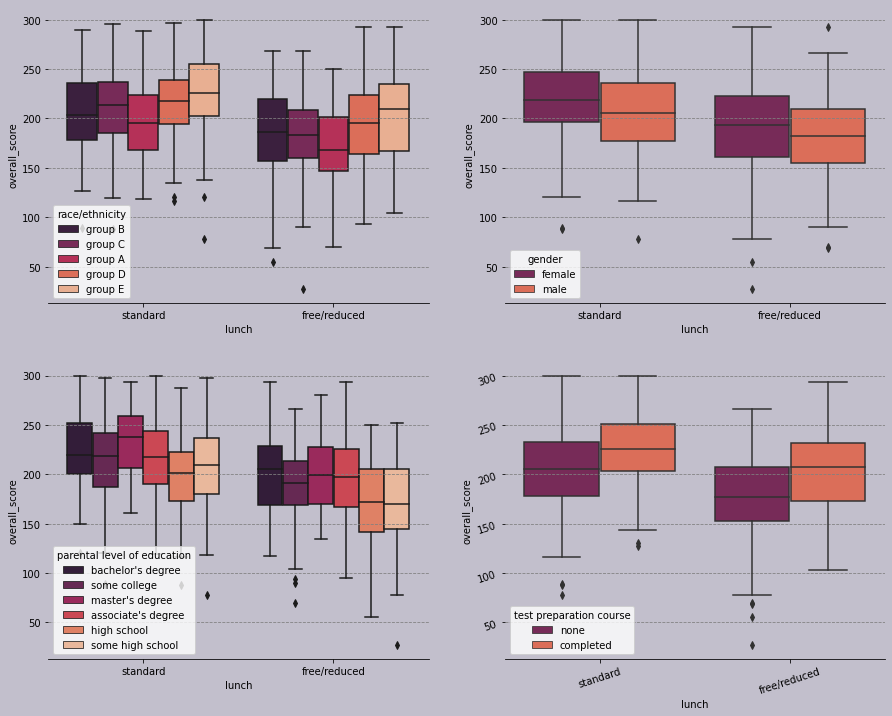

In [21]:
fig=plt.figure(figsize=(15,12))
grids=fig.add_gridspec(2,2)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])

axes=[ax00,ax01,ax10,ax11]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.boxplot(data=df,y='overall_score',x="lunch",hue='race/ethnicity',palette='rocket',ax=ax00)
sns.boxplot(data=df,y='overall_score',x='lunch',hue='gender',palette='rocket',ax=ax01)

sns.boxplot(data=df,y='overall_score',x='lunch',hue='parental level of education',palette='rocket',ax=ax10)
sns.boxplot(data=df,y='overall_score',x='lunch',hue='test preparation course',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)


description_plots=[ax00,ax01,ax10,ax11]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')



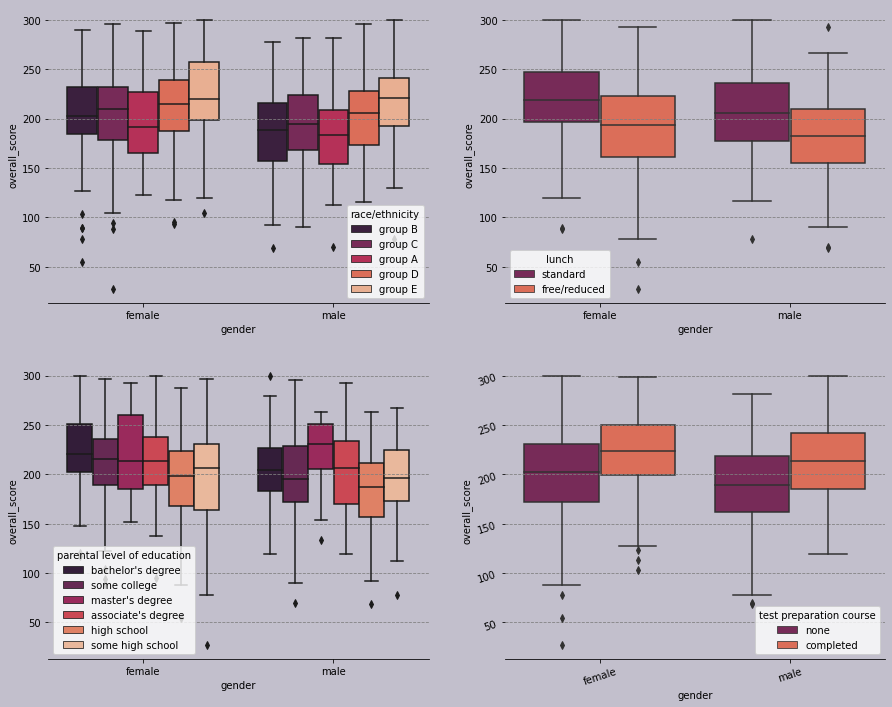

In [22]:
fig=plt.figure(figsize=(15,12))
grids=fig.add_gridspec(2,2)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])

axes=[ax00,ax01,ax10,ax11]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.boxplot(data=df,y='overall_score',x="gender",hue='race/ethnicity',palette='rocket',ax=ax00)
sns.boxplot(data=df,y='overall_score',x='gender',hue='lunch',palette='rocket',ax=ax01)

sns.boxplot(data=df,y='overall_score',x='gender',hue='parental level of education',palette='rocket',ax=ax10)
sns.boxplot(data=df,y='overall_score',x='gender',hue='test preparation course',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)


description_plots=[ax00,ax01,ax10,ax11]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')


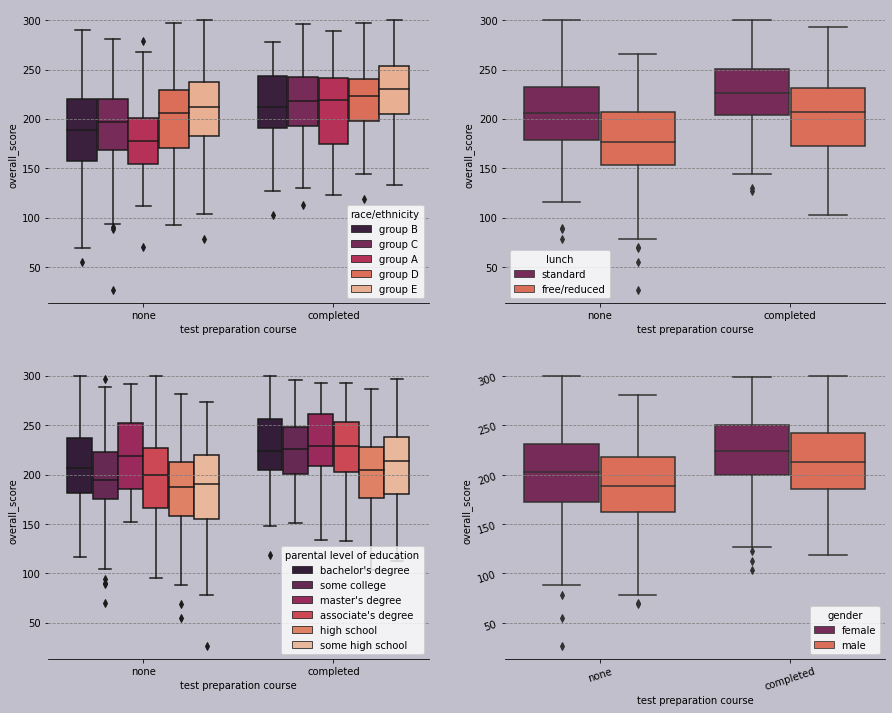

In [23]:
fig=plt.figure(figsize=(15,12))
grids=fig.add_gridspec(2,2)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])

axes=[ax00,ax01,ax10,ax11]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.boxplot(data=df,y='overall_score',x="test preparation course",hue='race/ethnicity',palette='rocket',ax=ax00)
sns.boxplot(data=df,y='overall_score',x='test preparation course',hue='lunch',palette='rocket',ax=ax01)

sns.boxplot(data=df,y='overall_score',x='test preparation course',hue='parental level of education',palette='rocket',ax=ax10)
sns.boxplot(data=df,y='overall_score',x='test preparation course',hue='gender',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)


description_plots=[ax00,ax01,ax10,ax11]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')


<html>
    <h1 style='background:gray;  color:pink; font-size:50px; padding:15px; border:10px solid red;'><center><b>CONCLUSION</b></center></h1>
</html>

* **Male performed better than females but more 100 marks are secured by females(strip plots)**

* **Students whose parents have master's degree have performed better than others , all students scored above 40 (strip plots)**

* **Standard Lunch's students are scoring better than other free/reduced (strip and box plots)**

* **We can't decide student's performance based on his/her race and ethnicity**

* **Students who completed their course have scored better than who does not (strip and box plots)**

* **As usual there always a underperformers in every class/school/college , definitely we also have many under performers in each category (see outliers in box plots)**

* **Math score , reading score and writing score are highly correlated if any student is peroforming better in anyone of subject we can say he/she will perform good in other subjects too**


**WRITING VS MATH SCORE**

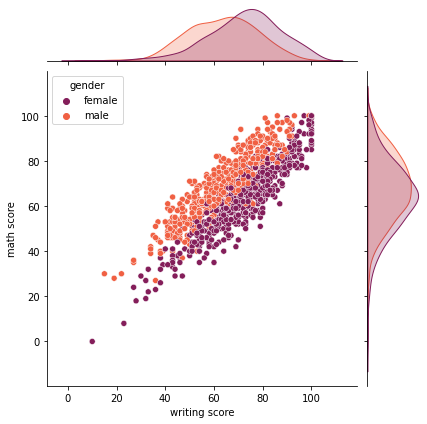

In [24]:
sns.jointplot(data=df,x='writing score',y='math score',palette='rocket',hue='gender')

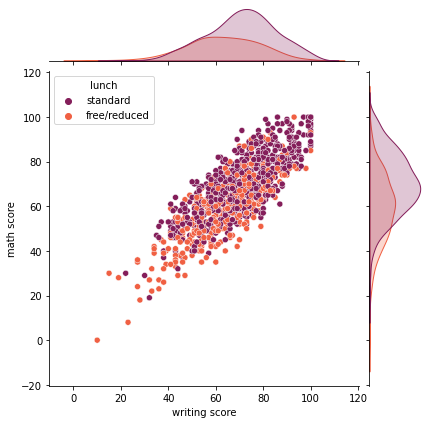

In [25]:
sns.jointplot(data=df,x='writing score',y='math score',palette='rocket',hue='lunch')

**READING VS MATH SCORE**

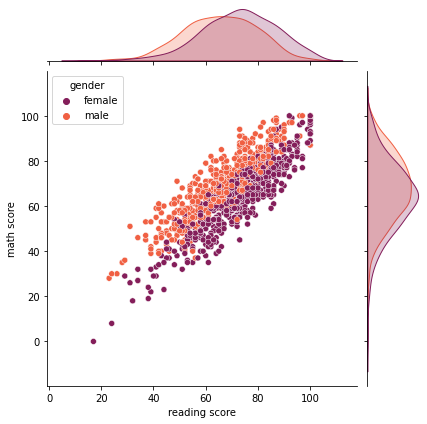

In [26]:
sns.jointplot(data=df,x='reading score',y='math score',palette='rocket',hue='gender')

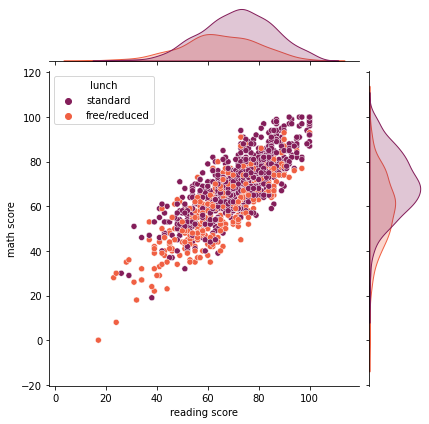

In [27]:
sns.jointplot(data=df,x='reading score',y='math score',palette='rocket',hue='lunch')

**READING VS WRITING SCORE**

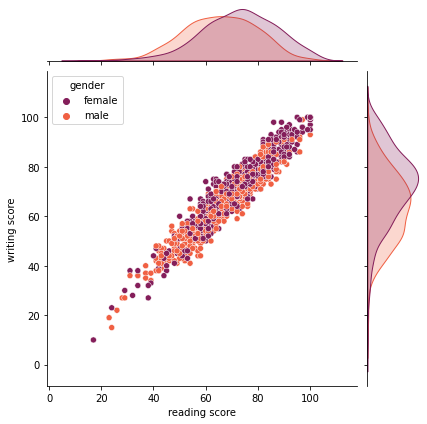

In [28]:
sns.jointplot(data=df,x='reading score',y='writing score',palette='rocket',hue='gender')

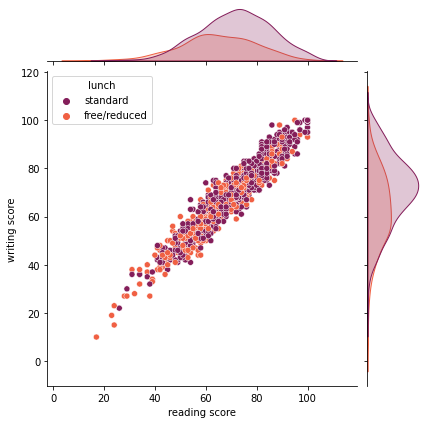

In [29]:
sns.jointplot(data=df,x='reading score',y='writing score',palette='rocket',hue='lunch')

<html>
    <h1 style='background:gray;  color:pink; font-size:50px; padding:15px; border:10px solid red;'><center><b>MODEL</b></center></h1>
</html>

<html>
    <p style='background:teal; color:coral; font-size:20px; padding:10px;'><b>IMPORTING LIBRARIES</b></p>
</html>

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,accuracy_score
import optuna

<html>
    <p style='background:teal; color:coral; font-size:20px; padding:10px;'><b>PREPROCESSING</b></p>
</html>

In [31]:
df=df.drop(['math score','writing score','reading score'],axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


In [32]:
df['gender']=df['gender'].map({'female':0 , 'male':1}).astype(int)
df['lunch']=df['lunch'].map({'standard':1 , 'free/reduced':0}).astype(int)
df['test preparation course']=df['test preparation course'].map({'none':0 , 'completed':1}).astype(int)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall_score
0,0,group B,bachelor's degree,1,0,218
1,0,group C,some college,1,1,247
2,0,group B,master's degree,1,0,278
3,1,group A,associate's degree,0,0,148
4,1,group C,some college,1,0,229
...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,282
996,1,group C,high school,0,0,172
997,0,group C,high school,0,1,195
998,0,group D,some college,1,1,223


In [33]:
df=pd.get_dummies(df)
df

,gender,lunch,test preparation course,overall_score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,218,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1,247,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,278,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,148,1,0,0,0,0,1,0,0,0,0,0
4,1,1,0,229,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,282,0,0,0,0,1,0,0,0,1,0,0
996,1,0,0,172,0,0,1,0,0,0,0,1,0,0,0
997,0,0,1,195,0,0,1,0,0,0,0,1,0,0,0
998,0,1,1,223,0,0,0,1,0,0,0,0,0,1,0


In [34]:
Y=df['overall_score']
X=df.drop('overall_score',axis=1)
X.head()

,gender,lunch,test preparation course,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [35]:
#SPLITTING
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
#MODEL
model=RandomForestRegressor()
model.fit(x_train,y_train)
    

RandomForestRegressor()

<html>
    <p style='background:teal; color:coral; font-size:20px; padding:10px;'><b>FEATURE IMPORTANCE</b></p>
</html>

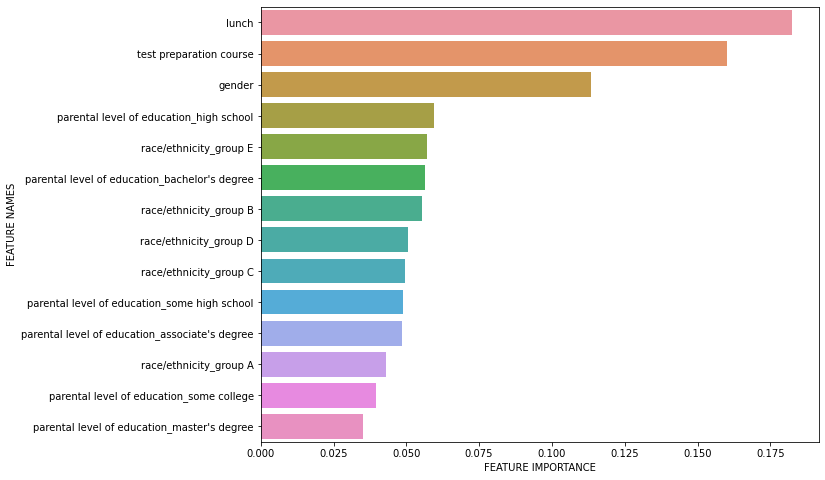

In [37]:
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(x_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

* **SO ACCORDING TO OUR RANDOMFOREST REGRESSOR 'type of lunch' , 'test preparation status of students' and 'gender of students' ARE TOP THREE FEATURES WHO ARE MOST IMPORTANT TO GET TO KNOW ABOUT STUDENT'S PERFORMANCE**

# **PLEASE PROVIDE YOUR FEEDBACKS BELOW :)**

* **IF YOU LIKE MY NOTEBOOK CONSIDER IT TO DO AN UPVOTE , IT CAN HELP ME TO GET A JOB**

* **IF YOU THINK THAT I HAVE TO DO SOMETHING MORE OR ANY STEP TO MAKE MY NOTEBOOK MORE ELABORATIVE LET ME KNOW IN THE COMMENT SECTION**
